In [13]:
import numpy             as np
import pandas            as pd
import tensorflow        as tf
import matplotlib.pyplot as plt

In [ ]:
%run preprocess_data.ipynb

In [15]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics         import top_k_accuracy_score, make_scorer


def plot_learning_curve(estimator, title, X, y, train_sizes=np.linspace(0.1, 1.0, 5)):
    # define & run cross-validation 
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    top_2_scorer = make_scorer(top_k_accuracy_score, needs_proba=True, k=2)

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, scoring=top_2_scorer, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

    # Plot learning curve
    plt.plot(train_sizes, np.mean(train_scores, axis=1), "o-", color="r", label="train")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), "o-", color="g", label="test")
    plt.grid() ; plt.title(title) ; plt.legend(loc="best")
    plt.show()

## SVM (linear, rbf, poly)

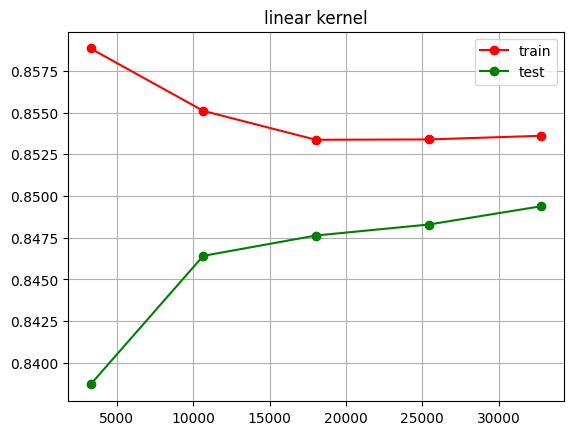

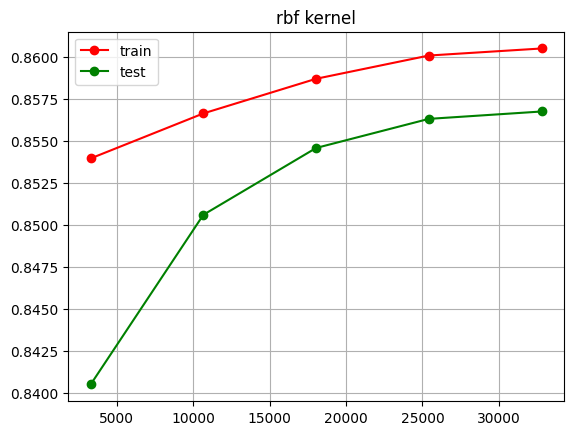

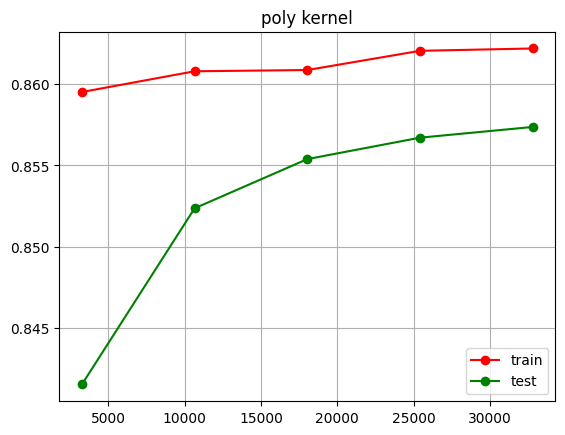

In [17]:
from sklearn.svm import SVC

for kernel in ['linear', 'rbf', 'poly']:
    svm_classifier = SVC(kernel=kernel, probability=True, C=1, decision_function_shape='ovo') 
    plot_learning_curve(svm_classifier, f'{kernel} kernel', X_all_normal, y)

## Neural Network

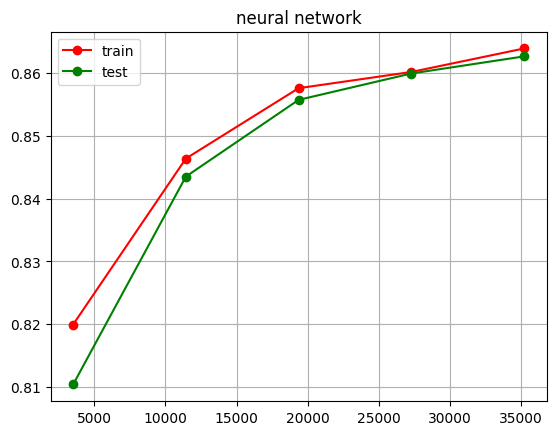

In [ ]:
import logging ; logging.disable(logging.WARNING)
from scikeras.wrappers import KerasClassifier

tf.random.set_seed(11235)

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_dim=X_train_normal.shape[1], activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(30, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(20, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax', kernel_initializer='he_uniform')
])

model_metrics = ['sparse_categorical_accuracy', 
                 tf.metrics.SparseTopKCategoricalAccuracy(k=2)]
                
nn_model.compile(loss='sparse_categorical_crossentropy', \
                 #optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), \
                 optimizer='sgd', \
                 metrics=model_metrics, \
                 steps_per_execution=50)

# history = nn_model.fit(X_train_normal, y_train, epochs=500, batch_size=256, verbose=2)
plot_learning_curve(KerasClassifier(nn_model, batch_size=256, epochs=250), 'neural network', X_all_normal, y)

## Histogram Gradient Boosting

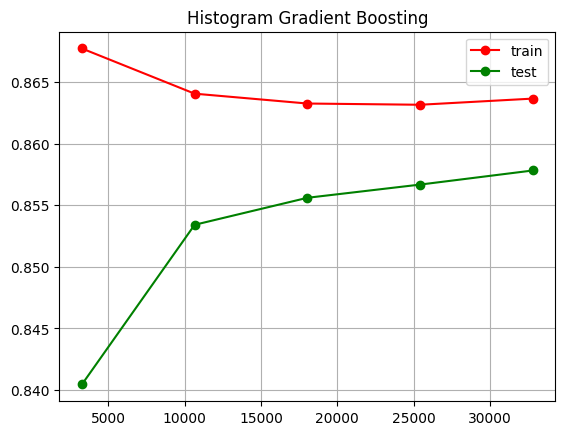

In [33]:
from sklearn.metrics         import top_k_accuracy_score
from sklearn.experimental    import enable_hist_gradient_boosting
from sklearn.ensemble        import HistGradientBoostingClassifier

hgb_classifier = HistGradientBoostingClassifier(max_bins=255, max_iter=100)
plot_learning_curve(hgb_classifier, f'Histogram Gradient Boosting', X_all_normal.toarray(), y)    

## (confusion matrix display)

In [12]:
# from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

# class estimator:
#   _estimator_type = ''
#   classes_=[]
#   def __init__(self, model, classes):
#     self.model = model
#     self._estimator_type = 'classifier'
#     self.classes_ = classes
#   def predict(self, X):
#     y_prob= self.model.predict(X)
#     y_pred = y_prob.argmax(axis=1)
#     return y_pred

# classifier = estimator(nn_model, list(all_data_df['label'].unique()))

# figsize = (12,12)
# tmp = ConfusionMatrixDisplay.from_estimator(estimator=classifier, 
#                                             X=X_test_normal, 
#                                             y=y_test, 
#                                             cmap='Blues', 
#                                             normalize='true', 
#                                             ax=plt.subplots(figsize=figsize)[1])

## (old SVM training)

In [57]:
# from sklearn import svm

# svm_classifier = svm.SVC(kernel='linear', probability=True, C=1, decision_function_shape='ovo').fit(X_train_normal, y_train)
# y_preds = svm_classifier.predict_proba(X_test_normal)
# print(f'linear score (accuracy)\t: {svm_classifier.score(X_test_normal, y_test)}')
# print(f'linear score (top-2)\t: {top_k_accuracy_score(y_test, y_preds, k=2, labels=labels)}')
# print('')

# svm_classifier = svm.SVC(kernel='rbf',    probability=True, C=1, decision_function_shape='ovo').fit(X_train_normal, y_train)
# y_preds = svm_classifier.predict_proba(X_test_normal)
# print(f'rbf score (accuracy)\t: {svm_classifier.score(X_test_normal, y_test)}')
# print(f'linear score (top-2)\t: {top_k_accuracy_score(y_test, y_preds, k=2, labels=labels)}')
# print('')

# svm_classifier = svm.SVC(kernel='poly',   probability=True, C=1, decision_function_shape='ovo').fit(X_train_normal, y_train)
# y_preds = svm_classifier.predict_proba(X_test_normal)
# print(f'poly score (accuracy)\t: {svm_classifier.score(X_test_normal, y_test)}')
# print(f'linear score (top-2)\t: {top_k_accuracy_score(y_test, y_preds, k=2, labels=labels)}')

## (old neural network accuracy graph)

In [ ]:
# print(history.history['sparse_categorical_accuracy'][-1], '\t', \
#       history.history['sparse_top_k_categorical_accuracy'][-1])

# plt.rcParams.update({'figure.autolayout': True})
# fig, axs = plt.subplots(2)
# plt.xlabel('epoch')

# axs[0].plot(history.history['sparse_top_k_categorical_accuracy'][3:])
# axs[0].set_title("top-2 accuracy")

# axs[1].plot(history.history['loss'][3:])
# axs[1].set_title("\nloss")
# plt.show()